In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [102]:
df = pd.read_csv("training_set1")
df = df[['Release','MoR','Budgets','Theaters','Total Gross']]
df.head()

,Release,MoR,Budgets,Theaters,Total Gross
0,How the Grinch Stole Christmas,11,123.0,3256,260.044825
1,Mission: Impossible II,5,125.0,3669,215.409889
2,Gladiator,5,103.0,3188,187.705427
3,The Perfect Storm,6,120.0,3407,182.618434
4,Meet the Parents,10,55.0,2697,166.244045


In [103]:
def label_hit_or_flop(df):
    ratio = df['Total Gross'] / df['Budgets']
    if ratio>=1.5:
        return 'Hit'
    else:
        return 'Flop'
df['Potential'] = df.apply(lambda df: label_hit_or_flop(df), axis=1)
df.head()

,Release,MoR,Budgets,Theaters,Total Gross,Potential
0,How the Grinch Stole Christmas,11,123.0,3256,260.044825,Hit
1,Mission: Impossible II,5,125.0,3669,215.409889,Hit
2,Gladiator,5,103.0,3188,187.705427,Hit
3,The Perfect Storm,6,120.0,3407,182.618434,Hit
4,Meet the Parents,10,55.0,2697,166.244045,Hit


In [104]:
maps = {'Hit':1,'Flop':0}

df['Result'] = df['Potential'].map(maps)
df.head()

,Release,MoR,Budgets,Theaters,Total Gross,Potential,Result
0,How the Grinch Stole Christmas,11,123.0,3256,260.044825,Hit,1
1,Mission: Impossible II,5,125.0,3669,215.409889,Hit,1
2,Gladiator,5,103.0,3188,187.705427,Hit,1
3,The Perfect Storm,6,120.0,3407,182.618434,Hit,1
4,Meet the Parents,10,55.0,2697,166.244045,Hit,1


In [105]:
X = df[['Budgets','Theaters','Total Gross']]
y = df['Potential']

In [127]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [129]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [130]:
k = np.floor(np.sqrt(len(y_test)))
k

26.0

In [131]:
knn = KNeighborsClassifier(n_neighbors = 26,p=2)

In [132]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=26)

In [133]:
knn.classes_

array([0, 1])

In [134]:
preds = knn.predict(X_test)

In [135]:
cm = confusion_matrix(y_test,preds)
cm

array([[410,   5],
       [ 42, 236]])

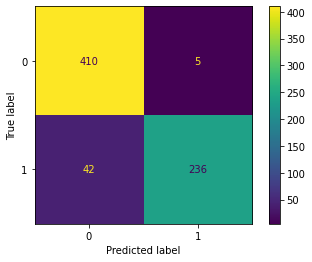

In [136]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=knn.classes_)
disp.plot()
plt.show()

In [137]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
accuracy

0.9321789321789322

In [138]:
tn,fp,fn,tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]

In [139]:
sensitivity = tp/(tp+fn)
sensitivity

0.8489208633093526

In [140]:
specificity = tn/(tn+fp)
specificity

0.9879518072289156

In [141]:
np.mean(preds==y_test)

0.9321789321789322

In [180]:
def roc(model):
    
    y_probs = model.predict_proba(x2_test)[:, 1]
    tp = []
    fp = []
    
    for i in range(1,10):
        j = i/10
        preds = (y_probs>j).astype(int)
        cm = confusion_matrix(y_test,preds)
        tp.append(cm[1][1])
        fp.append(cm[0][1])
#     roc_auc = auc(fp, tp)

#     # Print the AUC
#     print("AUC:", roc_auc)
    print(tp)
    print(fp)
    plt.plot(fp,tp)
    plt.show()

[278, 278, 277, 259, 236, 215, 179, 157, 116]
[170, 113, 84, 33, 5, 2, 1, 0, 0]


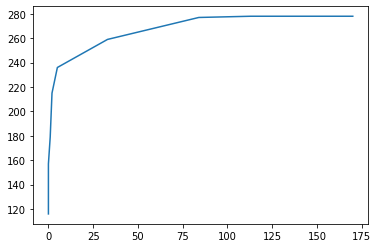

In [171]:
roc(knn)

In [144]:
from sklearn.metrics import roc_curve, roc_auc_score

In [163]:
probs = knn.predict_proba(X_test)
probs=probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label=1)

In [164]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00240964, 0.00240964, 0.00481928,
       0.00481928, 0.00722892, 0.01204819, 0.02650602, 0.05783133,
       0.07951807, 0.11566265, 0.1373494 , 0.20240964, 0.25301205,
       0.27228916, 0.3060241 , 0.36144578, 0.40963855, 0.45301205,
       0.51807229, 1.        ])

In [165]:
tpr

array([0.        , 0.3057554 , 0.3705036 , 0.46402878, 0.50719424,
       0.5647482 , 0.60071942, 0.64388489, 0.6942446 , 0.73021583,
       0.77338129, 0.82733813, 0.84892086, 0.87410072, 0.91726619,
       0.93165468, 0.96043165, 0.98920863, 0.99640288, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [166]:
thresholds

array([2.        , 1.        , 0.96153846, 0.88461538, 0.84615385,
       0.80769231, 0.76923077, 0.73076923, 0.69230769, 0.65384615,
       0.61538462, 0.57692308, 0.53846154, 0.5       , 0.46153846,
       0.42307692, 0.38461538, 0.34615385, 0.30769231, 0.26923077,
       0.23076923, 0.19230769, 0.15384615, 0.11538462, 0.07692308,
       0.03846154, 0.        ])

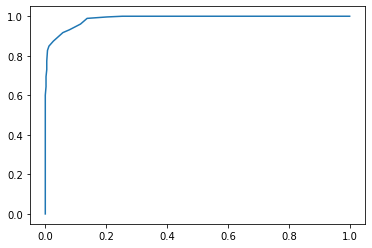

In [167]:
plt.plot(fpr,tpr)

In [169]:
print(roc_auc_score(y_test,probs))

0.9871717084163995


In [172]:
X2 = df[['Budgets','Theaters']]

In [173]:
x2_train,x2_test,y_train,y_test = train_test_split(X2,y,test_size=0.3,random_state=10)

In [174]:
x2_train = sc.fit_transform(x2_train)
x2_test = sc.transform(x2_test)

In [175]:
knn2 = KNeighborsClassifier(n_neighbors = 10)

In [176]:
knn2.fit(x2_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [177]:
preds2 = knn2.predict(x2_test)

In [178]:
cm2 = confusion_matrix(y_test,preds2)
cm2

array([[351,  49],
       [164, 129]])

[264, 234, 201, 157, 129, 100, 77, 59, 21]
[234, 176, 139, 92, 49, 33, 19, 7, 0]


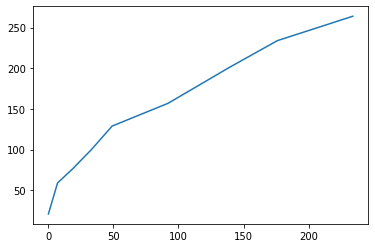

In [181]:
roc(knn2)